# BayesianRidgeRegression with MinMaxScaler & Polynomial Featuress


### This Code template is for the regression analysis using a simple Bayesian Ridge Regression based on the Bayesian Regression approach along with the feature rescaling technique MinMaxScaler and feature transformation technique PolynomialFeatures in a pipeline.

### Required Packages

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as se 
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [49]:
#filepath
file_path=""

List of features which are  required for model training .

In [50]:
#x_values

features=[]

Target feature for prediction.

In [51]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [52]:
df=pd.read_csv(file_path)
df.head()

,serNum,thick,stitchDen,elong,cotton,sewThrdCns
0,1,1.44,3,3.8,1,12.50
1,2,1.44,4,3.8,1,13.15
2,3,1.44,5,3.8,1,13.70
3,4,2.88,3,3.8,1,15.10
4,5,2.88,4,3.8,1,16.30


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [53]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [54]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [55]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,thick,stitchDen,elong,cotton
0,1.44,3,3.8,1
1,1.44,4,3.8,1
2,1.44,5,3.8,1
3,2.88,3,3.8,1
4,2.88,4,3.8,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

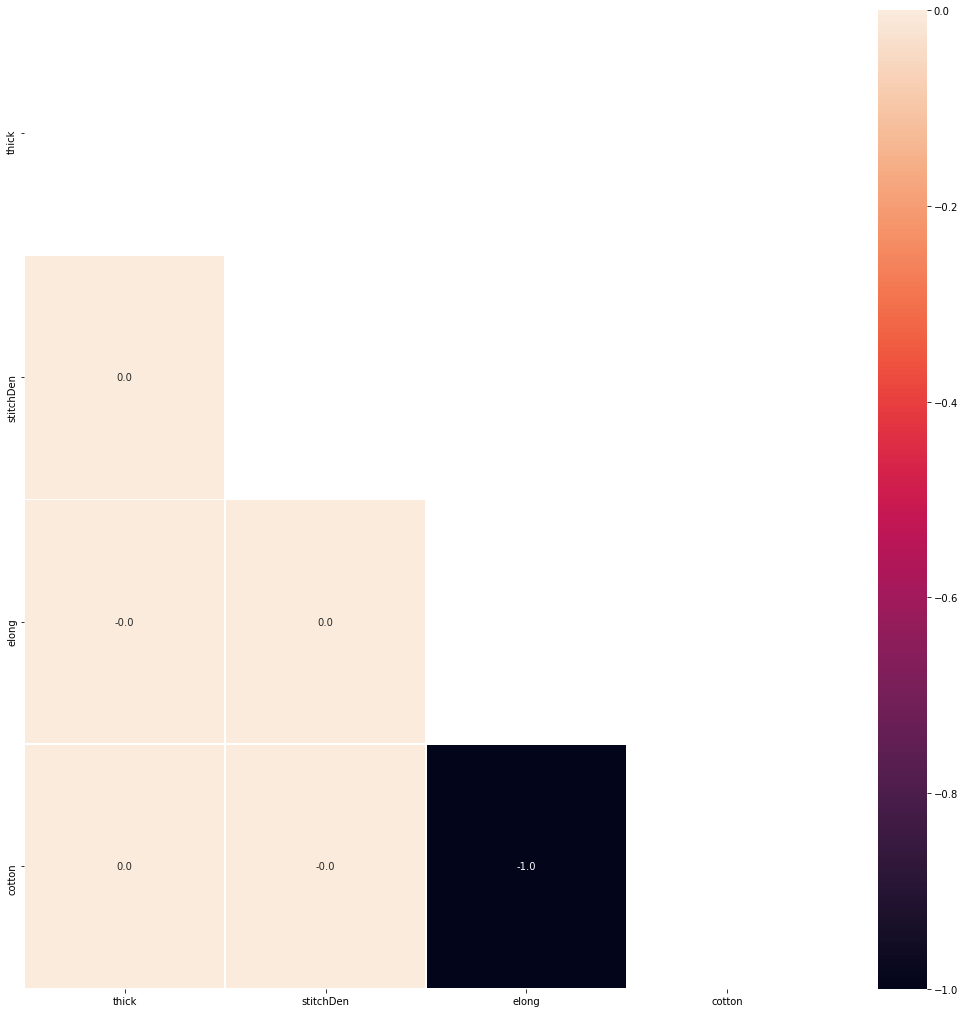

In [56]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Model

Bayesian Regression can be very useful when we have insufficient data in the dataset or the data is poorly distributed. The output of a Bayesian Regression model is obtained from a probability distribution, as compared to regular regression techniques where the output is just obtained from a single value of each attribute.
Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

If there is a large amount of data available for our dataset, the Bayesian approach is not good for such cases.

#### Model Tuning Parameters

> **alpha_1** : shape parameter for the Gamma distribution prior over the alpha parameter.

> **alpha_2** : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter.

> **lambda_1** : shape parameter for the Gamma distribution prior over the lambda parameter.

> **lambda_2** : inverse scale parameter (rate parameter) for the Gamma distribution prior over the lambda parameter.

### Data Rescaling

MinMaxScaler subtracts the minimum value in the feature and then divides by the range, where range is the difference between the original maximum and original minimum.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for parameters

### Feature Transformation

Generate polynomial and interaction features.
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for parameters.

In [58]:
model=make_pipeline(MinMaxScaler(),PolynomialFeatures(),BayesianRidge())
model.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('bayesianridge', BayesianRidge())])

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

> **score**: The **score** function returns the coefficient of determination <code>R<sup>2</sup></code> of the prediction.

In [59]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 98.56 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [60]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 98.56 %
Mean Absolute Error 0.33
Mean Squared Error 0.19


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

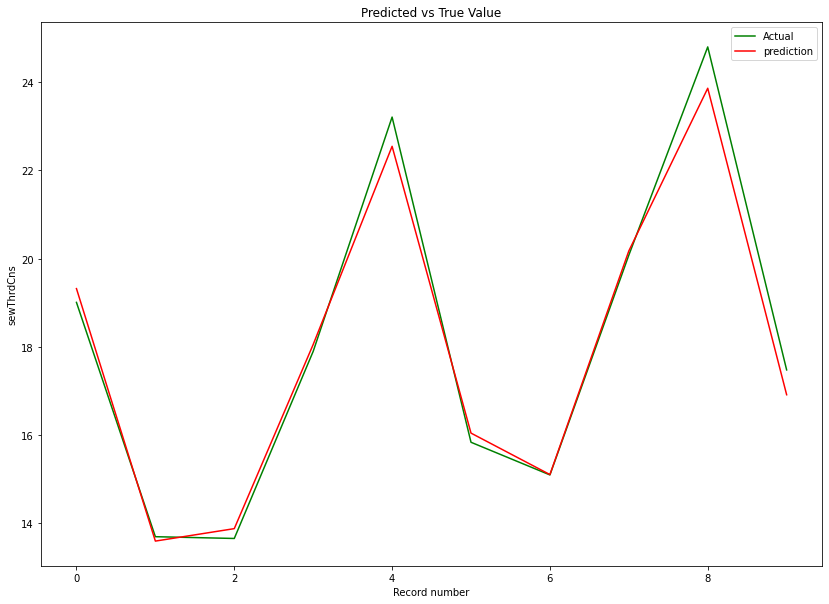

In [61]:
n=len(x_test) if len(x_test)<20 else 20
plt.figure(figsize=(14,10))
plt.plot(range(n),y_test[0:n], color = "green")
plt.plot(range(n),model.predict(x_test[0:n]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)
